# TCS Stock Price Prediction Using **LSTM**

1. Loading the data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
df = pd.read_csv("/content/sample_data/AAPL.csv")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df.shape

(184, 7)

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


# 2. Data Preprocessing

In [13]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [16]:
# Converting the 'Date' column into 'datetime' type
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       184 non-null    datetime64[ns]
 1   Open       184 non-null    float64       
 2   High       184 non-null    float64       
 3   Low        184 non-null    float64       
 4   Close      184 non-null    float64       
 5   Adj Close  184 non-null    float64       
 6   Volume     184 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 10.2 KB


In [18]:
# Making the 'Date' col  as index
df.set_index('Date', inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2014-09-29 to 2018-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [21]:
# Sortting the Index
df.sort_index(inplace=True)

In [22]:
# Data Normalization
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [23]:
scaler_values

array([[0.0932878 , 0.0771203 , 0.09722065, 0.10172151, 0.0620229 ,
        0.22581864],
       [0.08600681, 0.09595453, 0.10028358, 0.11412929, 0.07332598,
        0.52354607],
       [0.10170653, 0.08926782, 0.06477594, 0.079924  , 0.04216572,
        0.69299978],
       ...,
       [0.96621176, 0.93279841, 0.85615435, 0.83188024, 0.83684665,
        0.29065479],
       [0.86097853, 0.90694299, 0.85899043, 0.86362623, 0.86765484,
        0.25867766],
       [0.85796359, 0.8690516 , 0.87838909, 0.86362623, 0.86765484,
        0.        ]])

In [24]:
df_scaled = pd.DataFrame(scaler_values, columns=df.columns, index=df.index)

In [25]:
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,0.093288,0.077120,0.097221,0.101722,0.062023,0.225819
2014-10-06,0.086007,0.095955,0.100284,0.114129,0.073326,0.523546
2014-10-13,0.101707,0.089268,0.064776,0.079924,0.042166,0.693000
2014-10-20,0.067463,0.130614,0.099263,0.164319,0.119048,0.692985
2014-10-27,0.141752,0.159033,0.172774,0.195395,0.147357,0.393606


# 3. Plotting the Columns

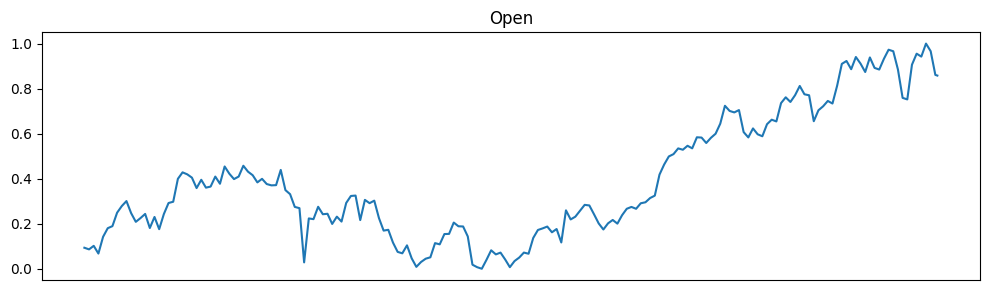

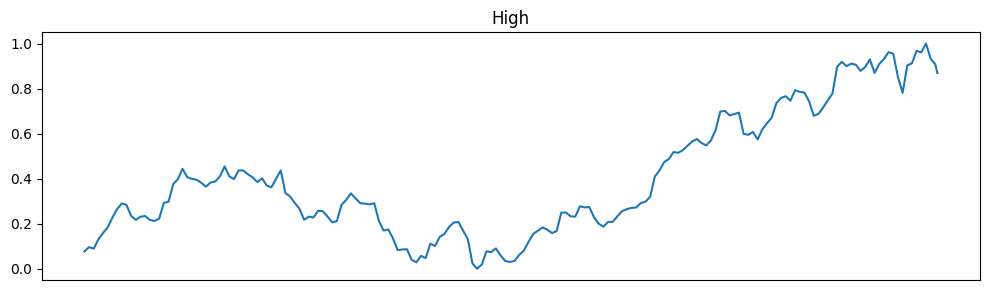

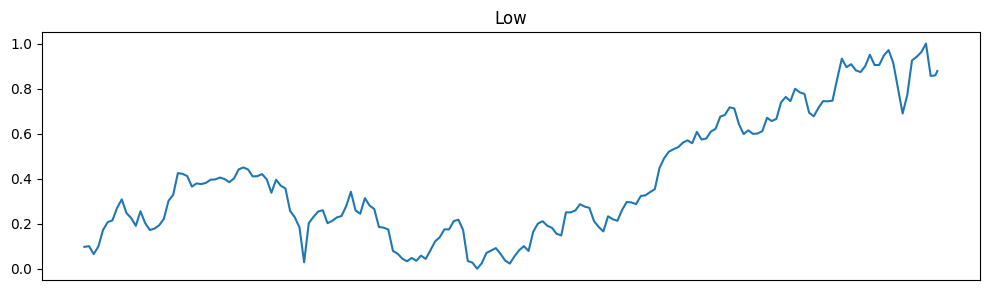

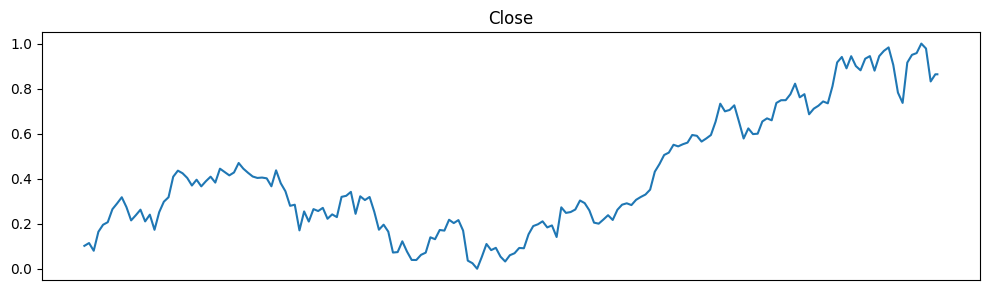

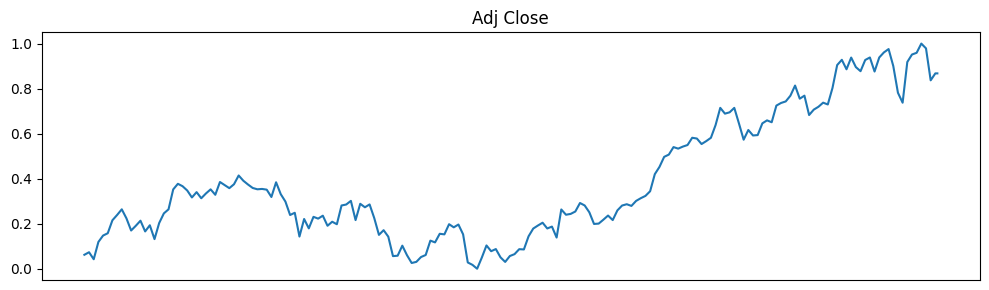

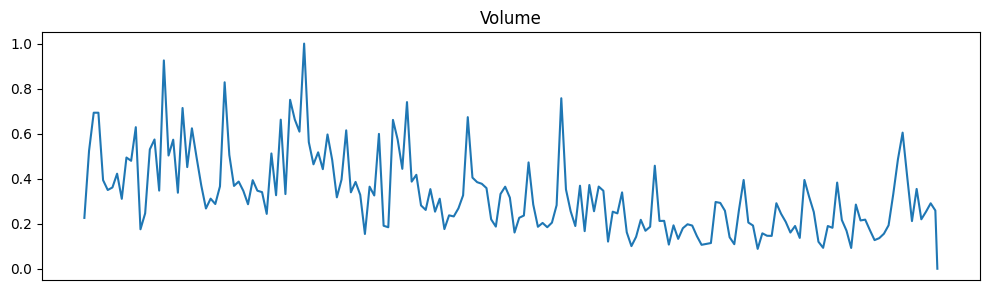

In [26]:
for column in df_scaled.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(df_scaled[column])
    plt.title(column)
    plt.xticks([])
    plt.tight_layout()
    plt.show()

# 4. Creating the sliding window sequences

In [27]:
def create_sequences(data, window_size):
  x = []
  y = []
  for i in range(window_size, len(data)):
    x.append(data.iloc[i-window_size:i].values)
    y.append(data.iloc[i].values)
  return np.array(x), np.array(y)

In [28]:
window_size = 60
x, y = create_sequences(df_scaled, window_size)

In [29]:
x.shape , y.shape

((124, 60, 6), (124, 6))

# 5. Train Test Split

In [30]:
x_train  , x_test , y_train ,  y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
x_train.shape , x_test.shape

((99, 60, 6), (25, 60, 6))

In [32]:
x_train.shape[1], x_train.shape[2]

(60, 6)

In [33]:
y_train.shape[1]

6

# 6. Bulding LSTM Modle

In [34]:
model = keras.Sequential([
    # First LSTM Layer
    keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Dropout(0.3),

    # Second LSTM Layer
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.Dropout(0.3),

    # Third LSTM Layer
    keras.layers.LSTM(units=50),
    keras.layers.Dropout(0.3),

    # Adding Output Layer
    keras.layers.Dense(y_train.shape[1])
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
# Compilation
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])

In [36]:
# EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

In [37]:
lstm_model = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=3,
    callbacks=[early_stopping]
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - RootMeanSquaredError: 0.3440 - loss: 0.1211 - val_RootMeanSquaredError: 0.1301 - val_loss: 0.0169
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - RootMeanSquaredError: 0.1670 - loss: 0.0284 - val_RootMeanSquaredError: 0.0815 - val_loss: 0.0066
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - RootMeanSquaredError: 0.1794 - loss: 0.0327 - val_RootMeanSquaredError: 0.1429 - val_loss: 0.0204
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - RootMeanSquaredError: 0.1611 - loss: 0.0260 - val_RootMeanSquaredError: 0.0905 - val_loss: 0.0082
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - RootMeanSquaredError: 0.1352 - loss: 0.0184 - val_RootMeanSquaredError: 0.1096 - val_loss: 0.0120
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - RootMeanSquaredError: 0.1517 - loss: 0.0231 - val_RootMeanSquaredError: 0.1207 - val_loss: 0.0146
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - RootMeanSquaredError: 0.1348

In [38]:
lstm_model.history

{'RootMeanSquaredError': [0.2796543538570404,
  0.16726015508174896,
  0.16124290227890015,
  0.14723840355873108,
  0.14404191076755524,
  0.14914506673812866,
  0.13663965463638306,
  0.14628614485263824,
  0.16834744811058044,
  0.14255815744400024,
  0.14988993108272552,
  0.14008860290050507],
 'loss': [0.07820656150579453,
  0.027975959703326225,
  0.025999274104833603,
  0.021679146215319633,
  0.020748071372509003,
  0.022244252264499664,
  0.018670395016670227,
  0.021399637684226036,
  0.028340859338641167,
  0.020322829484939575,
  0.02246698923408985,
  0.019624818116426468],
 'val_RootMeanSquaredError': [0.13006451725959778,
  0.08146333694458008,
  0.14288975298404694,
  0.09049653261899948,
  0.10957339406013489,
  0.12072362750768661,
  0.0843307226896286,
  0.1792754828929901,
  0.12792463600635529,
  0.08785820007324219,
  0.11221493780612946,
  0.08835993707180023],
 'val_loss': [0.016916779801249504,
  0.006636275444179773,
  0.020417483523488045,
  0.00818962231278

In [39]:
predictions = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


# 7. Forecasting the Data

In [40]:
predictions[:10]

array([[0.10422816, 0.1948014 , 0.17092761, 0.15227392, 0.153767  ,
        0.23940141],
       [0.12343497, 0.17321154, 0.17230248, 0.14575337, 0.14016646,
        0.19375245],
       [0.08298057, 0.15048061, 0.13446496, 0.11539523, 0.11395314,
        0.20707563],
       [0.6078591 , 0.61517644, 0.6346153 , 0.6091442 , 0.56954   ,
        0.12412339],
       [0.26727864, 0.29650673, 0.3101456 , 0.2837316 , 0.26311615,
        0.19033338],
       [0.7510261 , 0.7773691 , 0.775689  , 0.75967896, 0.7250892 ,
        0.094183  ],
       [0.2794054 , 0.31461418, 0.32285297, 0.29944885, 0.27892137,
        0.19027908],
       [0.9310686 , 0.96093774, 0.94266295, 0.9264149 , 0.89620554,
        0.04957094],
       [0.9299057 , 0.95918715, 0.940964  , 0.92485714, 0.89489794,
        0.04909898],
       [0.2557492 , 0.33124492, 0.33285198, 0.29875746, 0.2848666 ,
        0.2487046 ]], dtype=float32)

In [41]:
# inverse Scaling
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [42]:
predictions[:10]

array([[1.01551651e+02, 1.11249527e+02, 1.04537262e+02, 1.04142426e+02,
        1.01971550e+02, 1.48993456e+08],
       [1.03239937e+02, 1.09312271e+02, 1.04658470e+02, 1.03559090e+02,
        1.00717804e+02, 1.27905256e+08],
       [9.96839981e+01, 1.07272629e+02, 1.01323090e+02, 1.00843254e+02,
        9.83013840e+01, 1.34060096e+08],
       [1.45820816e+02, 1.48969788e+02, 1.45411346e+02, 1.45014038e+02,
        1.40298828e+02, 9.57391040e+07],
       [1.15883789e+02, 1.20375549e+02, 1.16809326e+02, 1.15902634e+02,
        1.12051704e+02, 1.26325768e+08],
       [1.58405197e+02, 1.63523331e+02, 1.57846985e+02, 1.58480865e+02,
        1.54637848e+02, 8.19077040e+07],
       [1.16949730e+02, 1.22000328e+02, 1.17929489e+02, 1.17308685e+02,
        1.13508682e+02, 1.26300680e+08],
       [1.74230927e+02, 1.79994949e+02, 1.72565735e+02, 1.73397079e+02,
        1.70411896e+02, 6.12985240e+07],
       [1.74128708e+02, 1.79837860e+02, 1.72415970e+02, 1.73257706e+02,
        1.70291351e+02, 

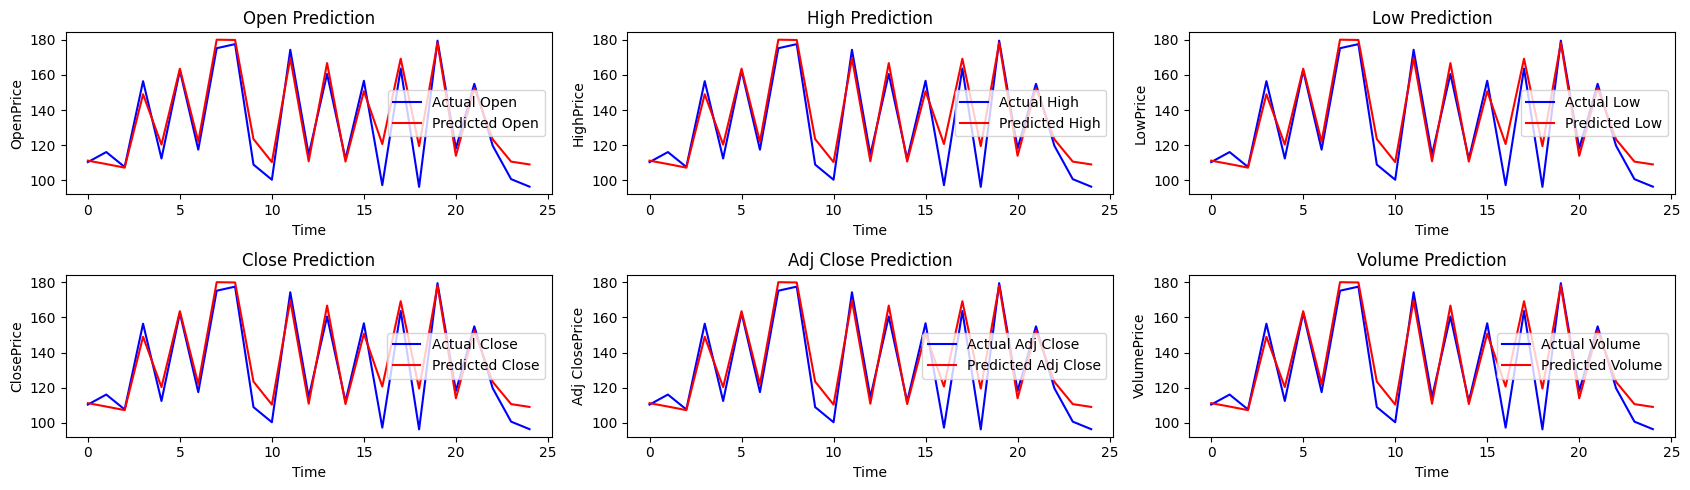

In [43]:
# Plotting the results
plt.figure(figsize=(17,5))

for i , col in enumerate(df_scaled.columns):
  plt.subplot(2,3,i+1)
  plt.plot(y_test_rescaled[:,1], color = 'blue' , label = f'Actual {col}')
  plt.plot(predictions[:,1], color = 'red' , label = f'Predicted {col}')
  plt.title(f'{col} Prediction')
  plt.xlabel('Time')
  plt.ylabel(f'{col}Price')
  plt.legend()
  plt.tight_layout()